Project on EDA by Anushil Timsina and Manjil Karki

Are Netflix movies getting any shorter?

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Create the years and durations lists(dummy data)
years = [2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]
durations = [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]

# Create a dictionary with the two lists
movie_dict = {'years':years,'durations':durations} 

# Print the dictionary
movie_dict

{'durations': [103, 101, 99, 100, 100, 95, 95, 96, 93, 90],
 'years': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]}

In [ ]:
np.mean(durations)

97.2

In [ ]:

# Create a DataFrame from the dictionary
durations_df = pd.DataFrame(movie_dict)

# Print the DataFrame
durations_df

,years,durations
0,2011,103
1,2012,101
2,2013,99
3,2014,100
4,2015,100
5,2016,95
6,2017,95
7,2018,96
8,2019,93
9,2020,90


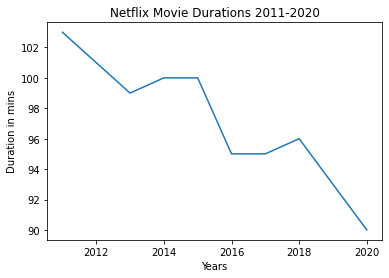

In [ ]:
fig = plt.figure()

# Draw a line plot of release_years and durations
plt.plot(years,durations)

# Create a title
plt.title("Netflix Movie Durations 2011-2020")
plt.xlabel('Years')
plt.ylabel('Duration in mins')
# Show the plot
plt.show()

In [ ]:
# Read in the CSV as a DataFrame
netflix_df = pd.read_csv("/content/drive/MyDrive/StudyMaterials/netflix_data.csv")

# Print the first five rows of the DataFrame
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


In [ ]:
netflix_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Sweden,"October 19, 2020",2005,99,When Lebanon's Civil War deprives Zozo of his ...,Dramas
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,111,A scrappy but poor boy worms his way into a ty...,Dramas
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,44,"In this documentary, South African rapper Nast...",Documentaries
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,1,Dessert wizard Adriano Zumbo looks for the nex...,International TV
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,United Kingdom,"March 1, 2020",2019,90,This documentary delves into the mystique behi...,Documentaries


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0, 0.5, 'Duration in mins')

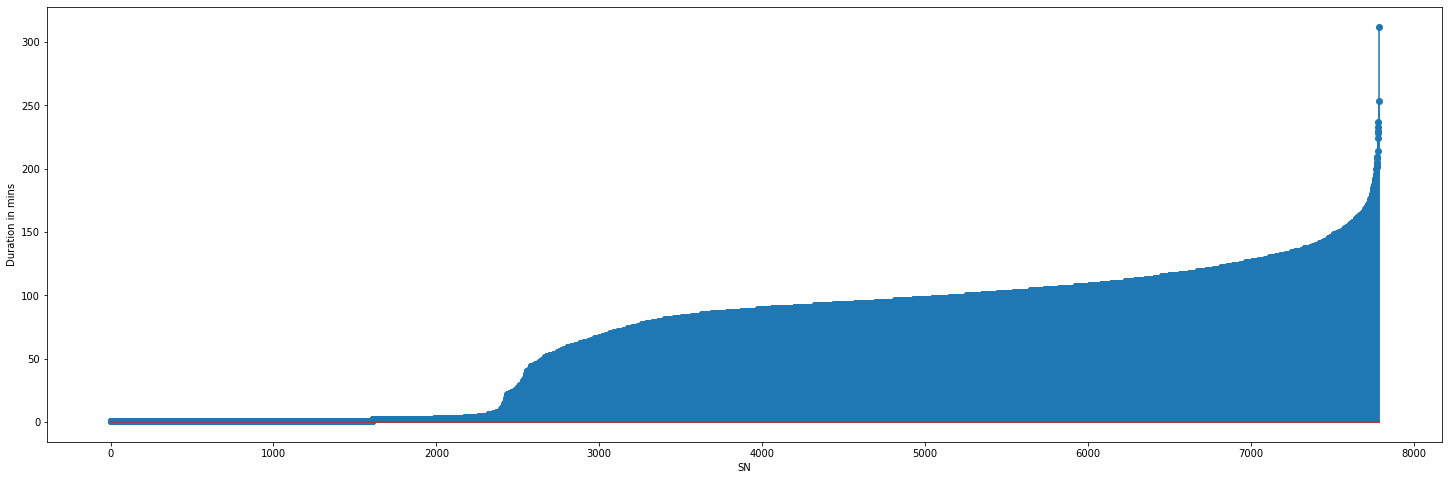

In [ ]:
fig,ax = plt.subplots(figsize = (25,8))
ax.stem(netflix_df.index, netflix_df['duration'].sort_values())
ax.set_xlabel('SN')
ax.set_ylabel('Duration in mins')

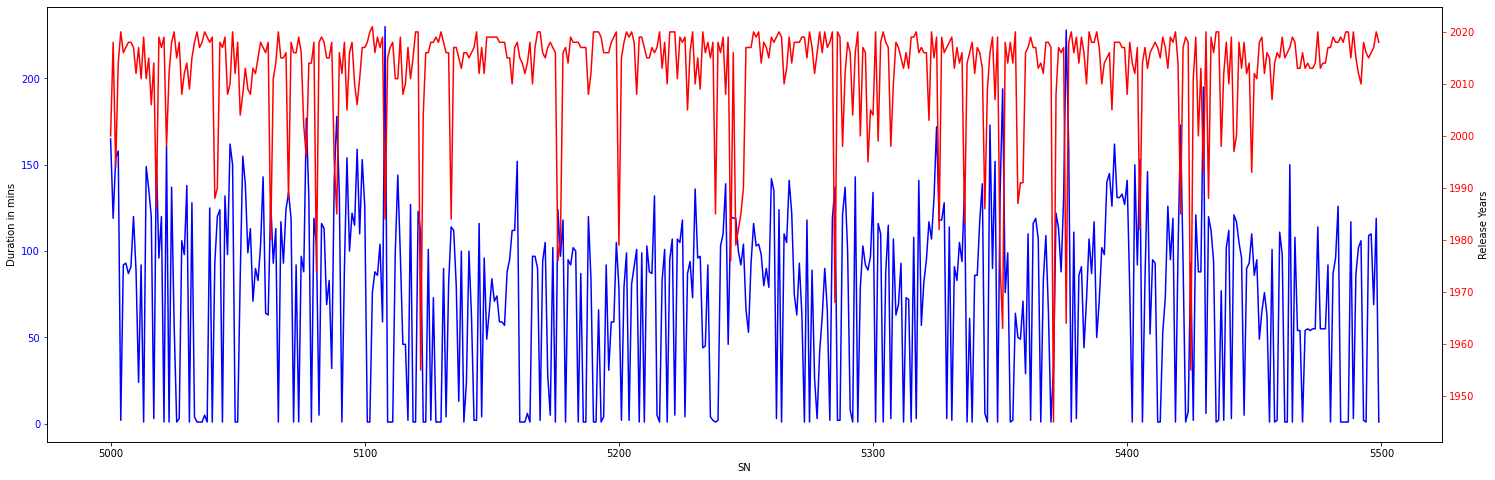

In [ ]:
category = netflix_df[5000:5500]
fig,ax = plt.subplots(figsize = (25,8))
ax.plot(category.index,category['duration'],color = 'blue')
ax.set_xlabel('SN')
ax.set_ylabel('Duration in mins')   # a bit more insightful
ax.tick_params('y',colors = 'blue')

ax2 =ax.twinx()
ax2.plot(category.index,category['release_year'],color = 'red')
ax2.set_ylabel('Release Years')
ax2.tick_params('y',colors = 'red')
plt.show()

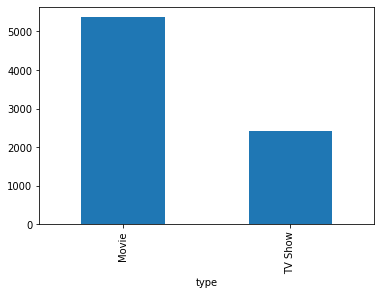

In [ ]:
netflix_df.groupby('type').size().plot(kind = 'bar')

<BarContainer object of 7787 artists>

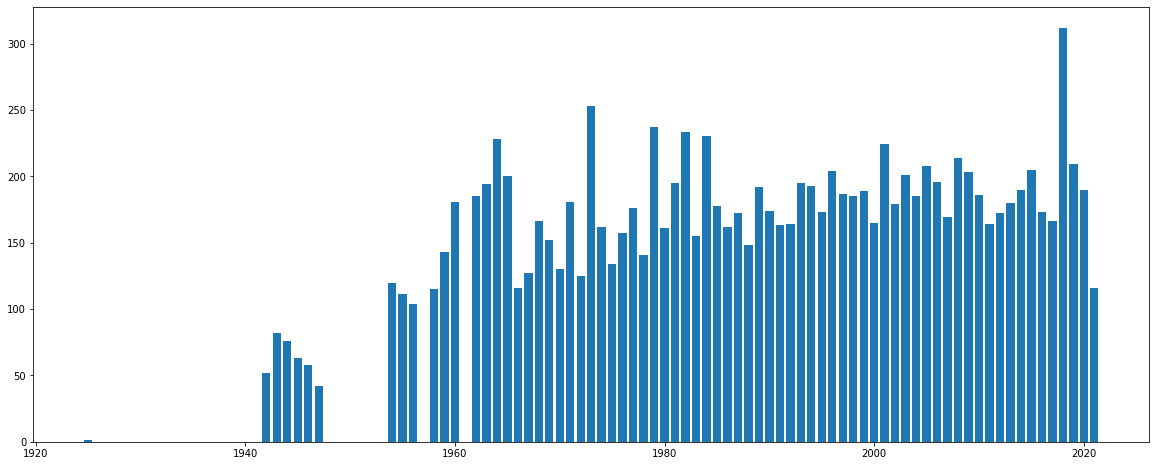

In [ ]:
f,ax =plt.subplots(figsize = (20,8))
plt.bar(netflix_df['release_year'], netflix_df['duration'])  

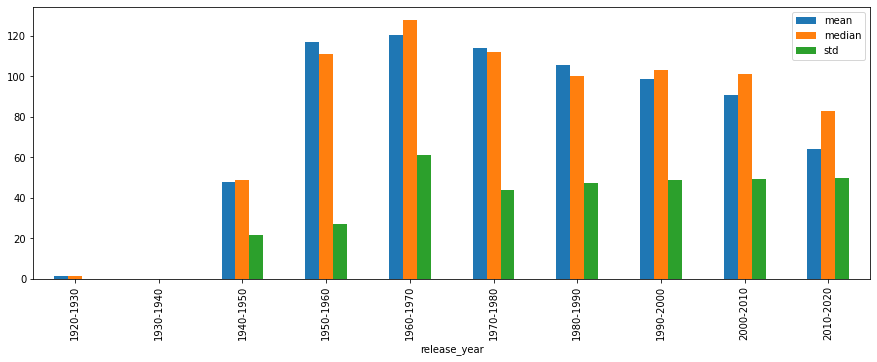

In [ ]:
bins = [i for i in range (1920, 2021, 10)]
labels=[f"{str(i)}-{str(i+10)}" for i in range (1920, 2011, 10)]
df=netflix_df.groupby(pd.cut(netflix_df['release_year'], bins=bins, labels=labels))['duration']
adf = df.describe()
adf = adf.rename(columns = {"50%": "median"})
adf[['mean', 'median', 'std']].plot(kind = "bar", width=0.5, figsize = (15, 5), linewidth = 5)

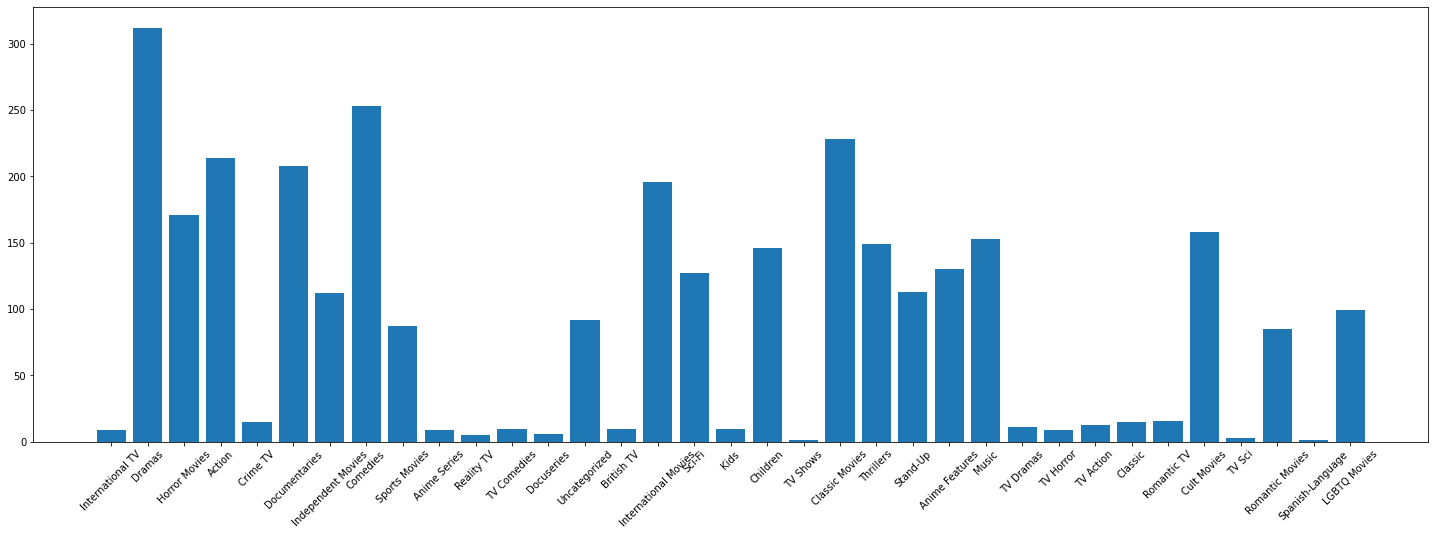

In [ ]:
f,ax =plt.subplots(figsize = (25,8))
plt.bar(netflix_df['genre'], netflix_df['duration'])
plt.xticks(rotation=45);

In [ ]:
netflix_df.groupby('country')['country'].count()

country
Argentina        68
Australia       108
Austria           8
Bangladesh        2
Belarus           1
               ... 
Uruguay           9
Venezuela         2
Vietnam           5
West Germany      1
Zimbabwe          1
Name: country, Length: 81, dtype: int64

In [ ]:
np.percentile(netflix_df['duration'],[25,50,75])  # data not correct or impure data

array([  2.,  88., 106.])

In [ ]:
netflix_df['duration'].mean()

69.12276871709258

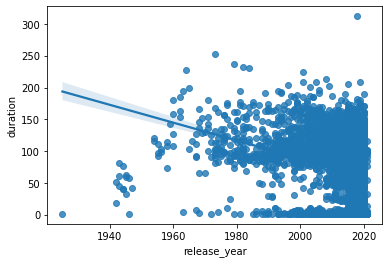

In [ ]:
sns.regplot(x = 'release_year',y = 'duration', data =netflix_df)  # skewed data

In [ ]:
# Subset the DataFrame for type "Movie"
netflix_df_movies_only = netflix_df[netflix_df['type']=='Movie']

# Select only the columns of interest
netflix_movies_col_subset = netflix_df_movies_only[['title','country','genre','release_year','duration']]

# Print the first five rows of the new DataFrame
netflix_movies_col_subset.head()

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95


In [ ]:
np.mean(netflix_movies_col_subset['duration'])

99.30797842663195

In [ ]:
np.median(netflix_movies_col_subset['duration'])

98.0

In [ ]:
netflix_movies_col_subset['duration'].std()

28.53088078610756

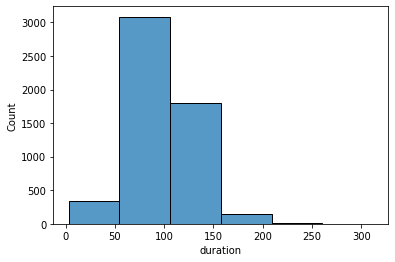

In [ ]:
sns.histplot(netflix_movies_col_subset['duration'],bins = 6 )

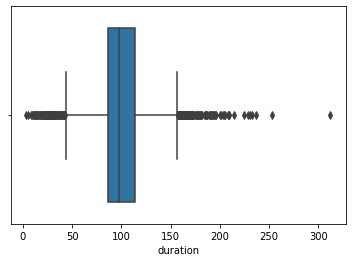

In [ ]:
sns.boxplot(x = netflix_movies_col_subset['duration']) # too many outliers so still impure data

In [ ]:
np.corrcoef(netflix_movies_col_subset['duration'],netflix_movies_col_subset['release_year'])

array([[ 1.        , -0.20489068],
       [-0.20489068,  1.        ]])

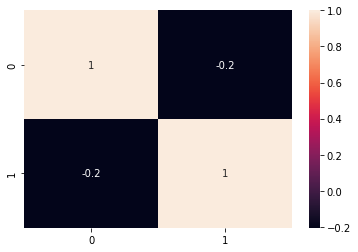

In [ ]:
sns.heatmap(np.corrcoef(netflix_movies_col_subset['duration'],netflix_movies_col_subset['release_year']),annot = True)

In [ ]:
slope , intercept = np.polyfit(netflix_movies_col_subset['duration'],netflix_movies_col_subset['release_year'],deg = 1)

In [ ]:
slope

-0.06939555874749273

In [ ]:
intercept

2019.8115624073694

In [ ]:
line = slope * netflix_movies_col_subset['duration'] + intercept

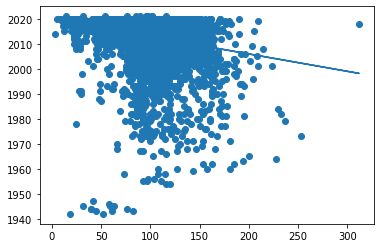

In [ ]:
plt.plot(netflix_movies_col_subset['duration'],line)
plt.scatter(netflix_movies_col_subset['duration'],netflix_movies_col_subset['release_year'])

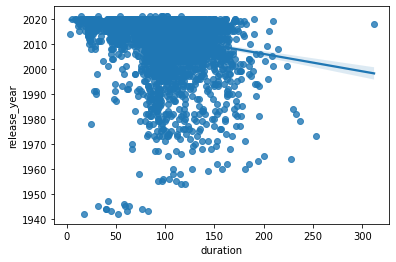

In [ ]:
sns.regplot(x = netflix_movies_col_subset['duration'],y =netflix_movies_col_subset['release_year'])

<function matplotlib.pyplot.show>

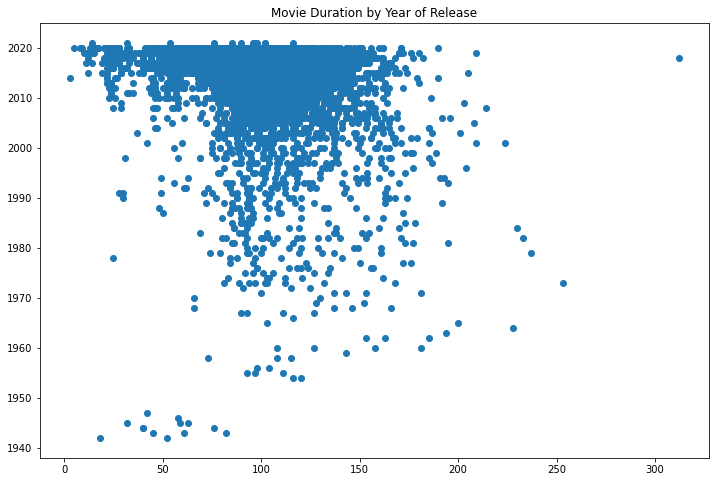

In [ ]:
# Create a figure and increase the figure size
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus year
plt.scatter(netflix_movies_col_subset['duration'],netflix_movies_col_subset['release_year'])

# Create a title
plt.title("Movie Duration by Year of Release")

# Show the plot
plt.show

In [ ]:
# Filter for durations shorter than 60 minutes
short_movies = netflix_movies_col_subset[netflix_movies_col_subset['duration'] < 60]

# Print the first 20 rows of short_movies
short_movies.head(20)

,title,country,genre,release_year,duration
35,#Rucker50,United States,Documentaries,2016,56
55,100 Things to do Before High School,United States,Uncategorized,2014,44
67,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Uncategorized,2017,37
101,3 Seconds Divorce,Canada,Documentaries,2018,53
146,A 3 Minute Hug,Mexico,Documentaries,2019,28
162,A Christmas Special: Miraculous: Tales of Lady...,France,Uncategorized,2016,22
171,A Family Reunion Christmas,United States,Uncategorized,2019,29
177,A Go! Go! Cory Carson Christmas,United States,Children,2020,22
178,A Go! Go! Cory Carson Halloween,NaN,Children,2020,22
179,A Go! Go! Cory Carson Summer Camp,NaN,Children,2020,21


In [ ]:
short_movies['duration'].mean()

41.983333333333334

In [ ]:
np.percentile(short_movies['duration'],[25,50,75])

array([29., 46., 54.])

<BarContainer object of 420 artists>

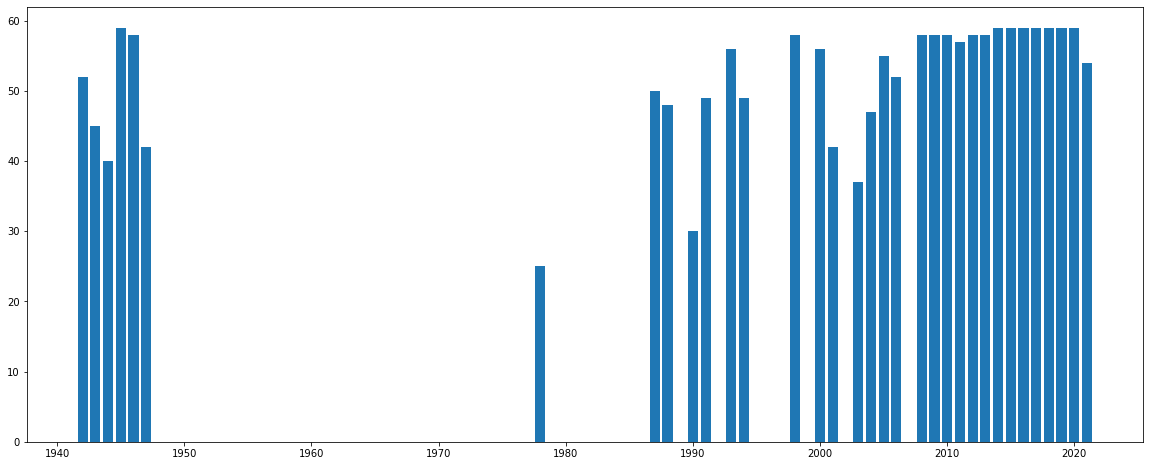

In [ ]:
f,ax =plt.subplots(figsize = (20,8))
plt.bar(short_movies['release_year'], short_movies['duration'])

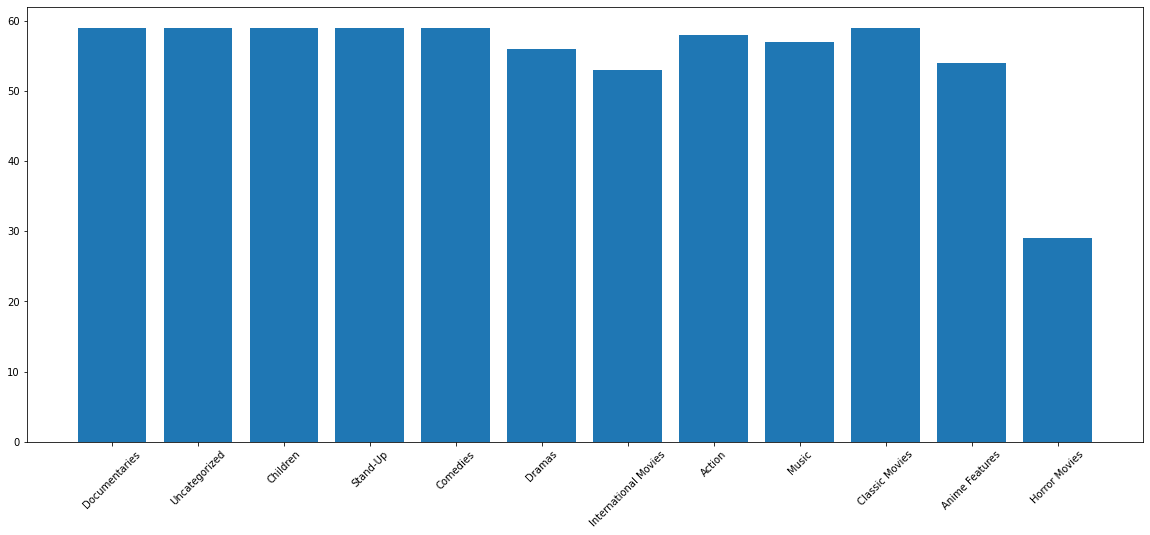

In [ ]:
f,ax =plt.subplots(figsize = (20,8))
plt.bar(short_movies['genre'], short_movies['duration'])
plt.xticks(rotation=45);


In [ ]:
genre = netflix_movies_col_subset['genre'].value_counts()

In [ ]:
# Define an empty list
colors = []
colors_map = {'Dramas':'blue', 'Comedies':'orange', 'Documentaries':'green', 'Action':'red', 
              # 'Children':'purple', 'Stand-Up':'brown', 'Horror MOvies':'pink'
              }




# colors = netflix_movies_col_subset['genre'].map(colors)


# Iterate over rows of netflix_movies_col_subset
for c, g in netflix_movies_col_subset.iterrows() :
    if g['genre'] in colors_map.keys() :
        colors.append(colors_map[g['genre']])
    else:
        colors.append('black')
        
# Inspect the first 10 values in your list        
colors[:10]

['blue',
 'black',
 'red',
 'blue',
 'black',
 'blue',
 'black',
 'black',
 'blue',
 'green']

<function matplotlib.pyplot.show>

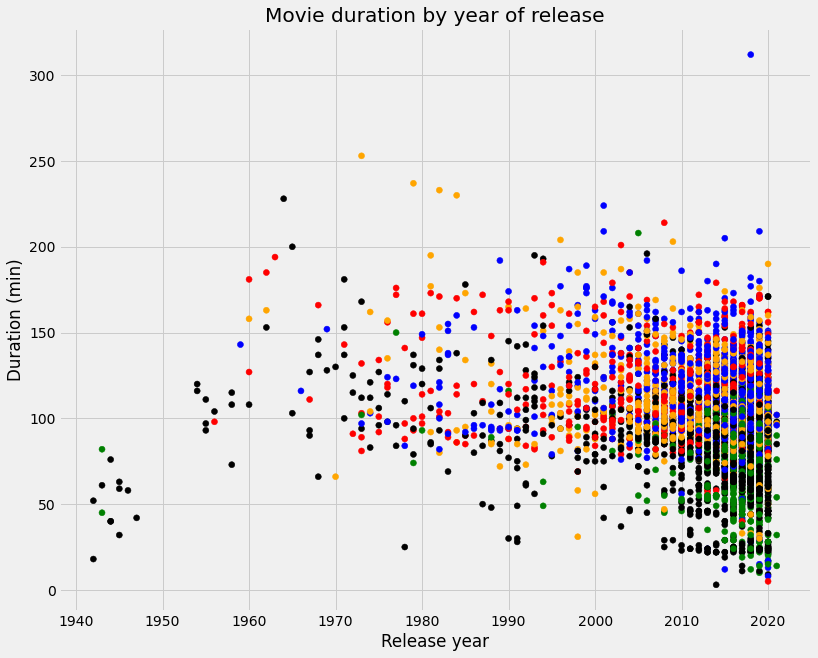

In [ ]:
# Set the figure style and initalize a new figure
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,10))

# Create a scatter plot of duration versus release_year
plt.scatter(netflix_movies_col_subset['release_year'],netflix_movies_col_subset['duration'],c=colors)

# Create a title and axis labels
plt.title("Movie duration by year of release")
plt.xlabel("Release year")
plt.ylabel("Duration (min)")
# Show the plot
plt.show